In [4]:
import glob
import numpy as np
import os.path as path
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm

In [18]:
csv = pd.read_csv('out.csv')
csv = csv.set_index('id', drop=False)
csv.loc[0] = 0
# insert 0 row to line up index with iloc
csv.sort_index(inplace=True)
print(np.sum(csv.iloc[1:125509]["accident"].values))

125508


In [3]:
csv.iloc[1023]

id                                     1023
jahr                                   2011
kanton                                   AG
monat                                     5
tag                                       7
stunde                                   19
accident                                  1
surface_asphalt                           f
surface_concrete                          f
surface_cobble                            f
surface_dirt                              t
surface_grass                             t
surface_gravel                            t
surface_paved                             f
dist_tl                             4754.97
lanes                                     2
speed                                    65
capacity                              26400
trucks                                  110
cars                                   1754
usage                             0.0706061
images              [0. 0. 0. ... 0. 0. 0.]
Name: 1023, dtype: object

In [4]:
#images = [imread(path) for path in paths]
#images = np.asarray(images)[:, :, :2]

In [3]:
import math
from sklearn.preprocessing import StandardScaler
def load_data():
    
    csv = pd.read_csv('out.csv')
    csv = csv.set_index('id', drop=False)
    csv.loc[0] = 0
    # insert 0 row to line up index with iloc
    csv.sort_index(inplace=True)
    csv["time_x"] = np.sin(csv["stunde"].values * 2 * math.pi / 24)
    csv["time_y"] = np.cos(csv["stunde"].values * 2 * math.pi / 24)
    csv["tag"] = csv["tag"] % 7
    csv["day_x"] = np.sin(csv["tag"].values * 2 * math.pi / 7)
    csv["day_y"] = np.cos(csv["tag"].values * 2 * math.pi / 7)
    csv["month_x"] = np.sin(csv["monat"].values * 2 * math.pi / 12)
    csv["month_y"] = np.cos(csv["monat"].values * 2 * math.pi / 12)
    
    IMAGE_PATH = 'images/{}.png'
    idx_neg = np.arange(125509, 375949)
    np.random.shuffle(idx_neg)
    idx_neg = idx_neg[:125509]
    print(idx_neg.shape)
    images = np.empty((125508*2+1, 2056))
    y = np.empty((125508*2+1,))
    for idx in tqdm(range(1, 125509)):
        #for the positives take in the ith image
        images[idx, :1024] = np.asarray(imread(IMAGE_PATH.format(idx)))[:, :, 0].flatten() / 255
        images[idx, 1024:2048] = np.asarray(imread(IMAGE_PATH.format(idx)))[:, :, 1].flatten() / 255
        images[idx, 2048] = csv.loc[idx]["time_x"]
        images[idx, 2049] = csv.loc[idx]["time_y"]
        images[idx, 2050] = csv.loc[idx]["day_x"]
        images[idx, 2051] = csv.loc[idx]["day_y"]
        images[idx, 2052] = csv.loc[idx]["month_x"]
        images[idx, 2053] = csv.loc[idx]["month_y"]
        images[idx, 2054] = idx #for checking later
        y[idx] = 1
        


        #for the negatives take in the ith random choice
        if idx > 125000:
            print(idx+125508)
            print(idx)
        images[idx+125508, :1024] = np.asarray(imread(IMAGE_PATH.format(idx_neg[idx])))[:, :, 0].flatten() / 255
        images[idx+125508, 1024:2048] = np.asarray(imread(IMAGE_PATH.format(idx_neg[idx])))[:, :, 1].flatten() / 255
        images[idx+125508, 2048] = csv.loc[idx_neg[idx]]["time_x"]
        images[idx+125508, 2049] = csv.loc[idx_neg[idx]]["time_y"]
        images[idx+125508, 2050] = csv.loc[idx_neg[idx]]["day_x"]
        images[idx+125508, 2051] = csv.loc[idx_neg[idx]]["day_y"]
        images[idx+125508, 2052] = csv.loc[idx_neg[idx]]["month_x"]
        images[idx+125508, 2053] = csv.loc[idx_neg[idx]]["month_y"]
        images[idx+125508, 2054] = idx_neg[idx] #for checking later
        images[idx+125508, 2055] = csv.loc[idx_neg[idx]]["accident"]
        y[idx+125508] = 0
        
    sc = StandardScaler(copy=False)
    sc.fit_transform(images[:2048])
       
    return images, y
def split_data():
    X, y= load_data()
    return train_test_split(X, y, test_size=0.2, shuffle=True)
    


In [5]:


X_train, X_test, y_train, y_test= split_data()

  0%|          | 17/125508 [00:00<12:40, 165.03it/s]

(125509,)


100%|█████████▉| 125038/125508 [07:48<00:01, 255.86it/s]

250509
125001
250510
125002
250511
125003
250512
125004
250513
125005
250514
125006
250515
125007
250516
125008
250517
125009
250518
125010
250519
125011
250520
125012
250521
125013
250522
125014
250523
125015
250524
125016
250525
125017
250526
125018
250527
125019
250528
125020
250529
125021
250530
125022
250531
125023
250532
125024
250533
125025
250534
125026
250535
125027
250536
125028
250537
125029
250538
125030
250539
125031
250540
125032
250541
125033
250542
125034
250543
125035
250544
125036
250545
125037
250546
125038
250547
125039
250548
125040
250549
125041
250550
125042
250551
125043
250552
125044
250553
125045
250554
125046


100%|█████████▉| 125089/125508 [07:49<00:01, 241.88it/s]

250555
125047
250556
125048
250557
125049
250558
125050
250559
125051
250560
125052
250561
125053
250562
125054
250563
125055
250564
125056
250565
125057
250566
125058
250567
125059
250568
125060
250569
125061
250570
125062
250571
125063
250572
125064
250573
125065
250574
125066
250575
125067
250576
125068
250577
125069
250578
125070
250579
125071
250580
125072
250581
125073
250582
125074
250583
125075
250584
125076
250585
125077
250586
125078
250587
125079
250588
125080
250589
125081
250590
125082
250591
125083
250592
125084
250593
125085
250594
125086
250595
125087
250596
125088
250597
125089
250598
125090
250599
125091
250600
125092
250601
125093


100%|█████████▉| 125138/125508 [07:49<00:01, 231.40it/s]

250602
125094
250603
125095
250604
125096
250605
125097
250606
125098
250607
125099
250608
125100
250609
125101
250610
125102
250611
125103
250612
125104
250613
125105
250614
125106
250615
125107
250616
125108
250617
125109
250618
125110
250619
125111
250620
125112
250621
125113
250622
125114
250623
125115
250624
125116
250625
125117
250626
125118
250627
125119
250628
125120
250629
125121
250630
125122
250631
125123
250632
125124
250633
125125
250634
125126
250635
125127
250636
125128
250637
125129
250638
125130
250639
125131
250640
125132
250641
125133
250642
125134
250643
125135
250644
125136
250645
125137
250646
125138


100%|█████████▉| 125186/125508 [07:49<00:01, 231.71it/s]

250647
125139
250648
125140
250649
125141
250650
125142
250651
125143
250652
125144
250653
125145
250654
125146
250655
125147
250656
125148
250657
125149
250658
125150
250659
125151
250660
125152
250661
125153
250662
125154
250663
125155
250664
125156
250665
125157
250666
125158
250667
125159
250668
125160
250669
125161
250670
125162
250671
125163
250672
125164
250673
125165
250674
125166
250675
125167
250676
125168
250677
125169
250678
125170
250679
125171
250680
125172
250681
125173
250682
125174
250683
125175
250684
125176
250685
125177
250686
125178
250687
125179
250688
125180
250689
125181
250690
125182
250691
125183
250692
125184
250693
125185
250694
125186
250695
125187


100%|█████████▉| 125234/125508 [07:49<00:01, 232.76it/s]

250696
125188
250697
125189
250698
125190
250699
125191
250700
125192
250701
125193
250702
125194
250703
125195
250704
125196
250705
125197
250706
125198
250707
125199
250708
125200
250709
125201
250710
125202
250711
125203
250712
125204
250713
125205
250714
125206
250715
125207
250716
125208
250717
125209
250718
125210
250719
125211
250720
125212
250721
125213
250722
125214
250723
125215
250724
125216
250725
125217
250726
125218
250727
125219
250728
125220
250729
125221
250730
125222
250731
125223
250732
125224
250733
125225
250734
125226
250735
125227
250736
125228
250737
125229
250738
125230
250739
125231
250740
125232
250741
125233
250742
125234
250743
125235


100%|█████████▉| 125282/125508 [07:49<00:00, 234.07it/s]

250744
125236
250745
125237
250746
125238
250747
125239
250748
125240
250749
125241
250750
125242
250751
125243
250752
125244
250753
125245
250754
125246
250755
125247
250756
125248
250757
125249
250758
125250
250759
125251
250760
125252
250761
125253
250762
125254
250763
125255
250764
125256
250765
125257
250766
125258
250767
125259
250768
125260
250769
125261
250770
125262
250771
125263
250772
125264
250773
125265
250774
125266
250775
125267
250776
125268
250777
125269
250778
125270
250779
125271
250780
125272
250781
125273
250782
125274
250783
125275
250784
125276
250785
125277
250786
125278
250787
125279
250788
125280
250789
125281
250790
125282
250791
125283


100%|█████████▉| 125330/125508 [07:50<00:00, 233.99it/s]

250792
125284
250793
125285
250794
125286
250795
125287
250796
125288
250797
125289
250798
125290
250799
125291
250800
125292
250801
125293
250802
125294
250803
125295
250804
125296
250805
125297
250806
125298
250807
125299
250808
125300
250809
125301
250810
125302
250811
125303
250812
125304
250813
125305
250814
125306
250815
125307
250816
125308
250817
125309
250818
125310
250819
125311
250820
125312
250821
125313
250822
125314
250823
125315
250824
125316
250825
125317
250826
125318
250827
125319
250828
125320
250829
125321
250830
125322
250831
125323
250832
125324
250833
125325
250834
125326
250835
125327
250836
125328
250837
125329
250838
125330
250839
125331


100%|█████████▉| 125354/125508 [07:50<00:00, 231.21it/s]

250840
125332
250841
125333
250842
125334
250843
125335
250844
125336
250845
125337
250846
125338
250847
125339
250848
125340
250849
125341
250850
125342
250851
125343
250852
125344
250853
125345
250854
125346
250855
125347
250856
125348
250857
125349
250858
125350
250859
125351
250860
125352
250861
125353
250862
125354
250863
125355
250864
125356
250865
125357
250866
125358
250867
125359
250868
125360
250869
125361
250870
125362
250871
125363
250872
125364
250873
125365
250874
125366
250875
125367
250876
125368
250877
125369
250878
125370
250879
125371
250880
125372
250881
125373
250882
125374
250883
125375
250884
125376


100%|█████████▉| 125402/125508 [07:50<00:00, 227.11it/s]

250885
125377
250886
125378
250887
125379
250888
125380
250889
125381
250890
125382
250891
125383
250892
125384
250893
125385
250894
125386
250895
125387
250896
125388
250897
125389
250898
125390
250899
125391
250900
125392
250901
125393
250902
125394
250903
125395
250904
125396
250905
125397
250906
125398
250907
125399
250908
125400
250909
125401
250910
125402
250911
125403
250912
125404
250913
125405
250914
125406
250915
125407
250916
125408
250917
125409
250918
125410
250919
125411
250920
125412
250921
125413
250922
125414
250923
125415
250924
125416
250925
125417
250926
125418
250927
125419
250928
125420
250929
125421
250930
125422


100%|█████████▉| 125448/125508 [07:50<00:00, 224.18it/s]

250931
125423
250932
125424
250933
125425
250934
125426
250935
125427
250936
125428
250937
125429
250938
125430
250939
125431
250940
125432
250941
125433
250942
125434
250943
125435
250944
125436
250945
125437
250946
125438
250947
125439
250948
125440
250949
125441
250950
125442
250951
125443
250952
125444
250953
125445
250954
125446
250955
125447
250956
125448
250957
125449
250958
125450
250959
125451
250960
125452
250961
125453
250962
125454
250963
125455
250964
125456
250965
125457
250966
125458
250967
125459
250968
125460
250969
125461
250970
125462
250971
125463
250972
125464
250973
125465
250974
125466
250975
125467
250976
125468
250977
125469
250978
125470


100%|██████████| 125508/125508 [07:50<00:00, 266.55it/s]

250979
125471
250980
125472
250981
125473
250982
125474
250983
125475
250984
125476
250985
125477
250986
125478
250987
125479
250988
125480
250989
125481
250990
125482
250991
125483
250992
125484
250993
125485
250994
125486
250995
125487
250996
125488
250997
125489
250998
125490
250999
125491
251000
125492
251001
125493
251002
125494
251003
125495
251004
125496
251005
125497
251006
125498
251007
125499
251008
125500
251009
125501
251010
125502
251011
125503
251012
125504
251013
125505
251014
125506
251015
125507
251016
125508


In [6]:
import pickle
pickle.dump(X_train, open("X_train.p", "wb"),protocol=4)
pickle.dump(X_test, open("X_test.p", "wb"),protocol=4)
pickle.dump(y_test, open("y_test.p", "wb"),protocol=4)
pickle.dump(y_train, open("y_train.p", "wb"),protocol=4)

id                                     1124
jahr                                   2011
kanton                                   AG
monat                                     7
tag                                       6
stunde                                   13
accident                                  1
surface_asphalt                           t
surface_concrete                          f
surface_cobble                            f
surface_dirt                              t
surface_grass                             t
surface_gravel                            t
surface_paved                             f
dist_tl                             4776.46
lanes                                     2
speed                                    65
capacity                              26400
trucks                                  249
cars                                   3109
usage                              0.127197
images              [0. 0. 0. ... 0. 0. 0.]
time_x                          

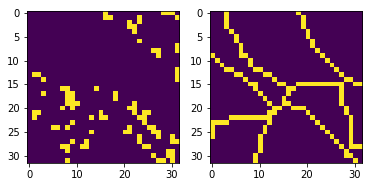

In [9]:
# Manually verify a datapoint
import matplotlib.pyplot as plt
im = images[1124]
im = im.reshape(32,32,2)
ax = plt.subplot(121)
plt.imshow(im[:,:,0])
plt.subplot(122)
plt.imshow(im[:,:,1])
print(csv.iloc[1124])

In [8]:
import math
csv["time_x"] = np.sin(csv["stunde"].values * 2 * math.pi / 24)
csv["time_y"] = np.cos(csv["stunde"].values * 2 * math.pi / 24)
csv["day_x"] = np.sin(csv["tag"].values * 2 * math.pi / 7)
csv["day_y"] = np.cos(csv["tag"].values * 2 * math.pi / 7)
csv["month_x"] = np.sin(csv["monat"].values * 2 * math.pi / 12)
csv["month_y"] = np.cos(csv["monat"].values * 2 * math.pi / 12)


In [14]:
print(images.shape)
features = [
    images,
    csv["time_x"].values.reshape(-1,1),
    csv["time_y"].values.reshape(-1,1),
    csv["day_x"].values.reshape(-1,1),
    csv["day_y"].values.reshape(-1,1),
    csv["month_x"].values.reshape(-1,1),
    csv["month_y"].values.reshape(-1,1)
]
print(csv["time_y"].values.shape)
images = np.concatenate(features, axis=1)

(375949, 2048)
(375949,)


In [10]:
import pickle
pickle.dump(X, open("X.p", "wb"),protocol=4)

In [ ]:
images_trimmed = images[:, :, :, :2]
print(images_trimmed.shape)

In [ ]:
images = images.astype(np.float32, copy=False)

In [ ]:
print(file_paths[0].split())

In [ ]:
images /= 255

In [ ]:
#get IDs
import re
ids= np.empty_like(file_paths, dtype=int)
for i,f in enumerate(file_paths):
    ids[i] = int(re.findall(r'\d+', f)[0])

In [47]:
csv[:10]

,id,jahr,kanton,monat,tag,stunde,accident,surface_asphalt,surface_concrete,surface_cobble,...,surface_grass,surface_gravel,surface_paved,dist_tl,lanes,speed,capacity,trucks,cars,usage
id,,,,,,,,,,,,,,,,,,,,,
371408,371408,2013,BE,9,7,19,0,f,f,f,...,f,t,f,7194.305488,2.0,100.0,35000.0,1022.0,7273.0,0.237000
371411,371411,2013,BE,1,2,19,0,t,f,f,...,t,t,f,5626.053610,2.0,50.0,30000.0,1146.0,11850.0,0.433200
371419,371419,2013,BE,8,14,4,0,t,f,f,...,t,t,f,7930.181843,2.0,80.0,30000.0,1193.0,10913.0,0.403533
371420,371420,2013,BE,8,2,9,0,t,f,f,...,t,t,f,7960.610135,2.0,80.0,30000.0,1193.0,10913.0,0.403533
371423,371423,2013,BE,12,11,6,0,t,f,f,...,t,t,f,8153.454932,2.0,80.0,30000.0,1193.0,10913.0,0.403533
371424,371424,2013,BE,12,5,11,0,t,f,f,...,t,t,f,7960.610135,2.0,80.0,30000.0,1193.0,10913.0,0.403533
371431,371431,2013,BE,6,9,23,0,t,f,f,...,t,t,f,19915.752894,2.0,80.0,24912.0,0.0,0.0,0.000000
371434,371434,2013,BE,5,2,16,0,f,f,f,...,f,t,f,7069.689928,NaN,NaN,NaN,NaN,NaN,NaN
371438,371438,2013,BE,7,6,16,0,t,f,f,...,t,t,f,20266.382703,2.0,80.0,24912.0,0.0,0.0,0.000000


In [10]:
print(images.shape)


(375949, 2048)


In [16]:
labels = csv["accident"].values
print(labels)

[0 1 1 ... 0 0 0]


In [17]:
print("postive: ", np.where(labels == 1)[0].shape[0])
print("negative: ", np.where(labels == 0)[0].shape[0])

postive:  125508
negative:  250441


NameError: name 'images' is not defined

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

In [19]:
def visualize_data(positive_images, negative_images):
    # INPUTS
    # positive_images - Images where the label = 1 (True)
    # negative_images - Images where the label = 0 (False)

    figure = plt.figure()
    count = 0
    for i in range(positive_images.shape[0]):
        count += 1
        figure.add_subplot(2, positive_images.shape[0], count)
        plt.imshow(positive_images[i, :, :])
        plt.axis('off')
        plt.title("1")

        figure.add_subplot(1, negative_images.shape[0], count)
        plt.imshow(negative_images[i, :, :])
        plt.axis('off')
        plt.title("0")
    plt.show()

In [20]:
N_TO_VISUALIZE = 10

# Select the first N positive examples
positive_example_indices = (labels == 1)
positive_examples = images[positive_example_indices, :, :]
positive_examples = positive_examples[0:N_TO_VISUALIZE, :, :]

# Select the first N negative examples
negative_example_indices = (labels == 0)
negative_examples = images[negative_example_indices, :, :]
negative_examples = negative_examples[0:N_TO_VISUALIZE, :, :]

# Call the visualization function
visualize_data(positive_examples, negative_examples)

IndexError: too many indices for array

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score, f1_score
from datetime import datetime
print(X_train.shape)

ModuleNotFoundError: No module named 'keras'

In [ ]:
def cnn(size, n_layers):
    # INPUTS
    # size     - size of the input images
    # n_layers - number of layers
    # OUTPUTS
    # model    - compiled CNN

    # Define hyperparamters
    MIN_NEURONS = 20
    MAX_NEURONS = 120
    KERNEL = (3, 3)

    # Determine the # of neurons in each convolutional layer
    steps = np.floor(MAX_NEURONS / (n_layers + 1))
    nuerons = np.arange(MIN_NEURONS, MAX_NEURONS, steps)
    nuerons = nuerons.astype(np.int32)

    # Define a model
    inputs = Input(shape=())
    shape = (size[0], size[1], size[2])
    model.add(Conv2D(20, KERNEL, input_shape=shape))
    model.add(Activation('relu'))
    model.add(Conv2D(40, KERNEL, input_shape=shape))
    model.add(Activation('relu'))
    model.add(Conv2D(80, KERNEL, input_shape=shape))
    model.add(Activation('relu'))
    model.add(Activation('relu'))


    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(MAX_NEURONS))
    model.add(Activation('relu'))

    # Add output layer
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Print a summary of the model
    model.summary()

    return model

In [ ]:
model = cnn((32, 32), 2)

In [ ]:
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [ ]:
LOG_DIRECTORY_ROOT = '~/Documents/keras/'
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
log_dir = "{}/run-{}/".format(LOG_DIRECTORY_ROOT, now)
tensorboard = TensorBoard(log_dir=log_dir, write_graph=True, write_images=True)

In [ ]:
# Place the callbacks in a list
callbacks = [early_stopping, tensorboard]

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=200, callbacks=callbacks, verbose=0)

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = np.round(test_predictions)

In [ ]:
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy: " + str(accuracy))